In [1]:
import pandas as pd

In [2]:
csvFilePath = "./src/data/usage.csv"

In [3]:
kwhDf = pd.read_csv(csvFilePath, parse_dates=['Date'])
kwhDf

,Date,kWh
0,2020-12-20,197.000000
1,2021-01-21,185.000000
2,2021-02-22,178.000000
3,2021-03-23,153.000000
4,2021-04-21,174.000000
5,2021-05-20,179.000000
6,2021-06-21,640.000000
7,2021-07-21,558.000000
8,2021-08-19,538.000000
9,2021-09-20,389.000000


In [4]:
kwhDf.dtypes

Date    datetime64[ns]
kWh            float64
dtype: object

<Axes: xlabel='Date'>

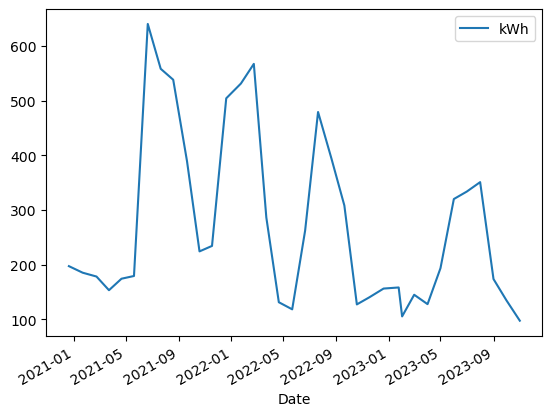

In [5]:
kwhDf.plot(kind='line', x='Date', y='kWh')

In [6]:
kwhDf.describe()

,Date,kWh
count,36,36.000000
mean,2022-05-31 07:20:00,271.927844
min,2020-12-20 00:00:00,97.212000
25%,2021-09-12 00:00:00,150.917250
50%,2022-06-06 00:00:00,195.147500
75%,2023-02-08 00:00:00,360.264500
max,2023-11-01 00:00:00,640.000000
std,NaN,158.403816


In [7]:
kwhInfoDf = pd.DataFrame(columns=['Metric', 'Value','Date', 'Annotation'])

In [8]:
kwhInfoDf

,Metric,Value,Date,Annotation


In [9]:


# Calculate mean, max, and min kWh
mean_kWh = kwhDf['kWh'].mean()
max_kWh = kwhDf['kWh'].max()
min_kWh = kwhDf['kWh'].min()

# Create a new row for the summary information
summary_row = pd.DataFrame({
    'Statistic': ['Mean', 'Max', 'Min'],
    'kWh': [mean_kWh, max_kWh, min_kWh],
    'Date': [kwhDf['Date'].mean(), kwhDf.loc[kwhDf['kWh'].idxmax(), 'Date'], kwhDf.loc[kwhDf['kWh'].idxmin(), 'Date']]
})

summary_row


,Statistic,kWh,Date
0,Mean,271.927844,2022-05-31 07:20:00
1,Max,640.000000,2021-06-21 00:00:00
2,Min,97.212000,2023-11-01 00:00:00


In [10]:

# Filter rows for the years 2021 and 2023
kWh_2021 = kwhDf[kwhDf['Date'].dt.year == 2021]['kWh'].sum()
kWh_2023 = kwhDf[kwhDf['Date'].dt.year == 2023]['kWh'].sum()

# Calculate percent decrease
percent_decrease = ((kWh_2021 - kWh_2023) / kWh_2021) * 100

# Display the result
print(f'Percent Decrease between 2021 and 2023: {percent_decrease:.2f}%')


Percent Decrease between 2021 and 2023: 45.97%


In [11]:
kWh_2022 = kwhDf[kwhDf['Date'].dt.year == 2022]['kWh'].sum()

In [12]:
condoSqFt = 816

In [13]:
eui_2021 = kWh_2021/condoSqFt
eui_2021

4.848039215686274

In [14]:
eui_2022 = kWh_2022/condoSqFt
eui_2022

4.2879901960784315

In [15]:
eui_2023 = kWh_2023/condoSqFt
eui_2023

2.6193656470588236

In [16]:
import os
from supabase import create_client, Client



In [17]:
from dotenv import load_dotenv

In [18]:
load_dotenv()

True

In [19]:
url: str = os.environ.get("SUPABASE_URL")
key: str = os.environ.get("SUPABASE_KEY")
supabase: Client = create_client(url, key)

In [20]:
print(url)

https://pfevxlfpwfdhmnfhluzs.supabase.co


In [21]:

response = supabase.table('monthlyUseXCel').select("*").execute()
response

2023-12-16 17:15:53,429:INFO - HTTP Request: GET https://pfevxlfpwfdhmnfhluzs.supabase.co/rest/v1/monthlyUseXCel?select=%2A "HTTP/1.1 200 OK"


APIResponse[~_ReturnT](data=[{'date': '2020-12-20', 'kWh': 197, 'annotation': None}, {'date': '2021-01-21', 'kWh': 185, 'annotation': None}, {'date': '2021-02-22', 'kWh': 178, 'annotation': None}, {'date': '2021-03-23', 'kWh': 153, 'annotation': None}, {'date': '2021-04-21', 'kWh': 174, 'annotation': None}, {'date': '2021-05-20', 'kWh': 179, 'annotation': None}, {'date': '2021-06-21', 'kWh': 640, 'annotation': None}, {'date': '2021-07-21', 'kWh': 558, 'annotation': None}, {'date': '2021-08-19', 'kWh': 538, 'annotation': None}, {'date': '2021-09-20', 'kWh': 389, 'annotation': None}, {'date': '2021-10-19', 'kWh': 224, 'annotation': None}, {'date': '2021-11-17', 'kWh': 234, 'annotation': None}, {'date': '2021-12-20', 'kWh': 504, 'annotation': None}, {'date': '2022-01-23', 'kWh': 531, 'annotation': None}, {'date': '2022-02-22', 'kWh': 567, 'annotation': None}, {'date': '2022-03-23', 'kWh': 286, 'annotation': None}, {'date': '2022-04-21', 'kWh': 131, 'annotation': None}, {'date': '2022-05-2

In [22]:

date, kWh = supabase.table('monthlyUseXCel').select('*').gte('kWh', 200).execute()
print(date, kWh)

2023-12-16 17:15:53,603:INFO - HTTP Request: GET https://pfevxlfpwfdhmnfhluzs.supabase.co/rest/v1/monthlyUseXCel?select=%2A&kWh=gte.200 "HTTP/1.1 200 OK"


('data', [{'date': '2021-06-21', 'kWh': 640, 'annotation': None}, {'date': '2021-07-21', 'kWh': 558, 'annotation': None}, {'date': '2021-08-19', 'kWh': 538, 'annotation': None}, {'date': '2021-09-20', 'kWh': 389, 'annotation': None}, {'date': '2021-10-19', 'kWh': 224, 'annotation': None}, {'date': '2021-11-17', 'kWh': 234, 'annotation': None}, {'date': '2021-12-20', 'kWh': 504, 'annotation': None}, {'date': '2022-01-23', 'kWh': 531, 'annotation': None}, {'date': '2022-02-22', 'kWh': 567, 'annotation': None}, {'date': '2022-03-23', 'kWh': 286, 'annotation': None}, {'date': '2022-06-21', 'kWh': 262, 'annotation': None}, {'date': '2022-07-21', 'kWh': 479, 'annotation': None}, {'date': '2022-08-21', 'kWh': 394, 'annotation': None}, {'date': '2022-09-20', 'kWh': 308, 'annotation': None}, {'date': '2023-06-01', 'kWh': 319.772328, 'annotation': None}, {'date': '2023-07-01', 'kWh': 333.391, 'annotation': None}, {'date': '2023-08-01', 'kWh': 350.686, 'annotation': None}]) ('count', None)


In [23]:
response.data

[{'date': '2020-12-20', 'kWh': 197, 'annotation': None},
 {'date': '2021-01-21', 'kWh': 185, 'annotation': None},
 {'date': '2021-02-22', 'kWh': 178, 'annotation': None},
 {'date': '2021-03-23', 'kWh': 153, 'annotation': None},
 {'date': '2021-04-21', 'kWh': 174, 'annotation': None},
 {'date': '2021-05-20', 'kWh': 179, 'annotation': None},
 {'date': '2021-06-21', 'kWh': 640, 'annotation': None},
 {'date': '2021-07-21', 'kWh': 558, 'annotation': None},
 {'date': '2021-08-19', 'kWh': 538, 'annotation': None},
 {'date': '2021-09-20', 'kWh': 389, 'annotation': None},
 {'date': '2021-10-19', 'kWh': 224, 'annotation': None},
 {'date': '2021-11-17', 'kWh': 234, 'annotation': None},
 {'date': '2021-12-20', 'kWh': 504, 'annotation': None},
 {'date': '2022-01-23', 'kWh': 531, 'annotation': None},
 {'date': '2022-02-22', 'kWh': 567, 'annotation': None},
 {'date': '2022-03-23', 'kWh': 286, 'annotation': None},
 {'date': '2022-04-21', 'kWh': 131, 'annotation': None},
 {'date': '2022-05-22', 'kWh': 

In [98]:
kwhDf_api = pd.DataFrame(response.data)
kwhDf_api

,date,kWh,annotation
0,2020-12-20,197.000000,None
1,2021-01-21,185.000000,None
2,2021-02-22,178.000000,None
3,2021-03-23,153.000000,None
4,2021-04-21,174.000000,None
5,2021-05-20,179.000000,None
6,2021-06-21,640.000000,None
7,2021-07-21,558.000000,None
8,2021-08-19,538.000000,None
9,2021-09-20,389.000000,None


In [102]:
kwhDf_api['date'] = pd.to_datetime(kwhDf_api['date'])
kwhDf_api.dtypes

date          datetime64[ns]
kWh                  float64
annotation            object
dtype: object

In [104]:
kwhDf_api['year'] = kwhDf_api['date'].dt.year
kwhDf_api['month'] = kwhDf_api['date'].dt.month
kwhDf_api

,date,kWh,annotation,year,month
0,2020-12-20,197.000000,None,2020,12
1,2021-01-21,185.000000,None,2021,1
2,2021-02-22,178.000000,None,2021,2
3,2021-03-23,153.000000,None,2021,3
4,2021-04-21,174.000000,None,2021,4
5,2021-05-20,179.000000,None,2021,5
6,2021-06-21,640.000000,None,2021,6
7,2021-07-21,558.000000,None,2021,7
8,2021-08-19,538.000000,None,2021,8
9,2021-09-20,389.000000,None,2021,9


In [122]:
kwhDf_apiSummary = kwhDf_api.groupby('year', as_index=False)


In [123]:
kwhDf_apiSum = kwhDf_apiSummary['kWh'].agg(['sum','mean','min','max'])
kwhDf_apiSum.head()

,year,sum,mean,min,max
0,2020,197.000000,197.000000,197.000,197.000
1,2021,3956.000000,329.666667,153.000,640.000
2,2022,3499.000000,291.583333,118.000,567.000
3,2023,2137.402368,194.309306,97.212,350.686


In [125]:
kwhDf_apiSumJSON = kwhDf_apiSum.to_dict('records')
kwhDf_apiSumJSON

[{'year': 2020, 'sum': 197.0, 'mean': 197.0, 'min': 197.0, 'max': 197.0},
 {'year': 2021,
  'sum': 3956.0,
  'mean': 329.6666666666667,
  'min': 153.0,
  'max': 640.0},
 {'year': 2022,
  'sum': 3499.0,
  'mean': 291.5833333333333,
  'min': 118.0,
  'max': 567.0},
 {'year': 2023,
  'sum': 2137.402368,
  'mean': 194.3093061818182,
  'min': 97.212,
  'max': 350.686}]

In [127]:
for record in kwhDf_apiSumJSON:
    data, count = supabase.table('summaryUseXCel').insert(record).execute()

2023-12-16 19:44:26,830:INFO - HTTP Request: POST https://pfevxlfpwfdhmnfhluzs.supabase.co/rest/v1/summaryUseXCel "HTTP/1.1 201 Created"
2023-12-16 19:44:26,991:INFO - HTTP Request: POST https://pfevxlfpwfdhmnfhluzs.supabase.co/rest/v1/summaryUseXCel "HTTP/1.1 201 Created"
2023-12-16 19:44:27,060:INFO - HTTP Request: POST https://pfevxlfpwfdhmnfhluzs.supabase.co/rest/v1/summaryUseXCel "HTTP/1.1 201 Created"
2023-12-16 19:44:27,201:INFO - HTTP Request: POST https://pfevxlfpwfdhmnfhluzs.supabase.co/rest/v1/summaryUseXCel "HTTP/1.1 201 Created"


In [25]:
import requests

In [26]:
eiaSalesBaseAPIURL = "https://api.eia.gov/v2/electricity/retail-sales/data/"

In [27]:
eiaSalesParams = "frequency=monthly&data[0]=sales&start=2021-01&end=2023-09&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

In [28]:
eiaKey: str = os.environ.get("EIA_API_KEY")

In [29]:
request = eiaSalesBaseAPIURL + "?" + "api_key=" + eiaKey + "&" + eiaSalesParams

In [30]:
requestTest = eiaSalesBaseAPIURL + "?" + "api_key=" + eiaKey

In [31]:
request

'https://api.eia.gov/v2/electricity/retail-sales/data/?api_key=t8zUXcj1850iZOtKOfVzBnfe5mTGBdPZKADKdfK8&frequency=monthly&data[0]=sales&start=2021-01&end=2023-09&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'

In [32]:
eiaResponse = requests.get(request)
eiaResponse.json()

{'response': {'warnings': [{'warning': 'incomplete return',
    'description': 'The API can only return 5000 rows in JSON format.  Please consider constraining your request with facet, start, or end, or using offset to paginate results.'}],
  'total': 12276,
  'dateFormat': 'YYYY-MM',
  'frequency': 'monthly',
  'data': [{'period': '2023-09',
    'stateid': 'MD',
    'stateDescription': 'Maryland',
    'sectorid': 'RES',
    'sectorName': 'residential',
    'sales': 2215.58311,
    'sales-units': 'million kilowatthours'},
   {'period': '2023-09',
    'stateid': 'MD',
    'stateDescription': 'Maryland',
    'sectorid': 'OTH',
    'sectorName': 'other',
    'sales': None,
    'sales-units': 'million kilowatthours'},
   {'period': '2023-09',
    'stateid': 'MD',
    'stateDescription': 'Maryland',
    'sectorid': 'IND',
    'sectorName': 'industrial',
    'sales': 297.29678,
    'sales-units': 'million kilowatthours'},
   {'period': '2023-09',
    'stateid': 'MD',
    'stateDescription': 

In [33]:
import warnings
# Suppress Pydantic deprecated warning
warnings.filterwarnings("ignore", category=UserWarning, module="pydantic")


In [34]:
if eiaResponse.status_code == 200:
    # Parse the JSON response
    data = eiaResponse.json()

    # Extract the relevant data from the response
    series_data = data['response']['data']

    # Create a DataFrame
    df = pd.DataFrame(series_data)

    # Display the DataFrame
    print(df.head())
else:
    print("Error fetching data from the API. Status code:", response.status_code)

    period stateid stateDescription sectorid   sectorName       sales  \
0  2023-09      MD         Maryland      RES  residential  2215.58311   
1  2023-09      MD         Maryland      OTH        other         NaN   
2  2023-09      MD         Maryland      IND   industrial   297.29678   
3  2023-09      MD         Maryland      COM   commercial  2428.78351   
4  2023-09      MD         Maryland      ALL  all sectors  4978.10583   

             sales-units  
0  million kilowatthours  
1  million kilowatthours  
2  million kilowatthours  
3  million kilowatthours  
4  million kilowatthours  


In [87]:
# Placeholder for all data
all_data = []

# Assume your API supports pagination and has parameters like 'offset' and 'limit'
offset = 0
limit = 500

# Set with an initial value to enter the loop below.
results_len = 1
total = 1 
# We loop until we get no results.
while offset < total:
    params = {'length': limit, 'offset': offset}
    eiaResponse = requests.get(request, params=params)
    
    # Parse the JSON response
    data = eiaResponse.json()
    total = data['response']['total']
    # Extract the relevant data from the response
    series_data = data['response']['data']
    print(data)
    # Extend the all_data list with the new data
    all_data.extend(series_data)

    # Set the next limit.
    offset = limit + offset
    print("offset ", offset)




{'response': {'warnings': [{'warning': 'incomplete return', 'description': 'The API can only return 5000 rows in JSON format.  Please consider constraining your request with facet, start, or end, or using offset to paginate results.'}], 'total': 12276, 'dateFormat': 'YYYY-MM', 'frequency': 'monthly', 'data': [{'period': '2023-09', 'stateid': 'MD', 'stateDescription': 'Maryland', 'sectorid': 'RES', 'sectorName': 'residential', 'sales': 2215.58311, 'sales-units': 'million kilowatthours'}, {'period': '2023-09', 'stateid': 'MD', 'stateDescription': 'Maryland', 'sectorid': 'OTH', 'sectorName': 'other', 'sales': None, 'sales-units': 'million kilowatthours'}, {'period': '2023-09', 'stateid': 'MD', 'stateDescription': 'Maryland', 'sectorid': 'IND', 'sectorName': 'industrial', 'sales': 297.29678, 'sales-units': 'million kilowatthours'}, {'period': '2023-09', 'stateid': 'MD', 'stateDescription': 'Maryland', 'sectorid': 'COM', 'sectorName': 'commercial', 'sales': 2428.78351, 'sales-units': 'milli

In [88]:
len(all_data)

12276

In [90]:
# Create a DataFrame
df = pd.DataFrame(all_data)

# Display the DataFrame
print(df.head())

    period stateid stateDescription sectorid   sectorName       sales  \
0  2023-09      MD         Maryland      RES  residential  2215.58311   
1  2023-09      MD         Maryland      OTH        other         NaN   
2  2023-09      MD         Maryland      IND   industrial   297.29678   
3  2023-09      MD         Maryland      COM   commercial  2428.78351   
4  2023-09      MD         Maryland      ALL  all sectors  4978.10583   

             sales-units  
0  million kilowatthours  
1  million kilowatthours  
2  million kilowatthours  
3  million kilowatthours  
4  million kilowatthours  


In [91]:
df.describe

<bound method NDFrame.describe of         period stateid stateDescription sectorid      sectorName       sales  \
0      2023-09      MD         Maryland      RES     residential  2215.58311   
1      2023-09      MD         Maryland      OTH           other         NaN   
2      2023-09      MD         Maryland      IND      industrial   297.29678   
3      2023-09      MD         Maryland      COM      commercial  2428.78351   
4      2023-09      MD         Maryland      ALL     all sectors  4978.10583   
...        ...     ...              ...      ...             ...         ...   
12271  2021-01      WA       Washington      TRA  transportation     8.26364   
12272  2021-01      WV    West Virginia      ALL     all sectors  3200.38569   
12273  2021-01      SD     South Dakota      ALL     all sectors  1148.47246   
12274  2021-01      SD     South Dakota      COM      commercial   400.44510   
12275  2021-01      SD     South Dakota      IND      industrial   245.56296   

     

In [92]:
df.dropna(inplace=True)
df.head()

,period,stateid,stateDescription,sectorid,sectorName,sales,sales-units
0,2023-09,MD,Maryland,RES,residential,2215.58311,million kilowatthours
2,2023-09,MD,Maryland,IND,industrial,297.29678,million kilowatthours
3,2023-09,MD,Maryland,COM,commercial,2428.78351,million kilowatthours
4,2023-09,MD,Maryland,ALL,all sectors,4978.10583,million kilowatthours
5,2023-09,ME,Maine,TRA,transportation,0.00000,million kilowatthours


In [93]:
df.describe

<bound method NDFrame.describe of         period stateid stateDescription sectorid      sectorName       sales  \
0      2023-09      MD         Maryland      RES     residential  2215.58311   
2      2023-09      MD         Maryland      IND      industrial   297.29678   
3      2023-09      MD         Maryland      COM      commercial  2428.78351   
4      2023-09      MD         Maryland      ALL     all sectors  4978.10583   
5      2023-09      ME            Maine      TRA  transportation     0.00000   
...        ...     ...              ...      ...             ...         ...   
12271  2021-01      WA       Washington      TRA  transportation     8.26364   
12272  2021-01      WV    West Virginia      ALL     all sectors  3200.38569   
12273  2021-01      SD     South Dakota      ALL     all sectors  1148.47246   
12274  2021-01      SD     South Dakota      COM      commercial   400.44510   
12275  2021-01      SD     South Dakota      IND      industrial   245.56296   

     

In [48]:
dfRes = df.loc[df['sectorName'] == "residential"]
dfRes

,period,stateid,stateDescription,sectorid,sectorName,sales,sales-units
0,2023-09,MD,Maryland,RES,residential,2215.58311,million kilowatthours
6,2023-09,ME,Maine,RES,residential,401.10472,million kilowatthours
12,2023-09,LA,Louisiana,RES,residential,3608.40701,million kilowatthours
18,2023-09,KY,Kentucky,RES,residential,2126.25874,million kilowatthours
24,2023-09,KS,Kansas,RES,residential,1362.21342,million kilowatthours
...,...,...,...,...,...,...,...
4970,2022-08,AL,Alabama,RES,residential,3362.92716,million kilowatthours
4976,2022-08,CO,Colorado,RES,residential,2253.91184,million kilowatthours
4982,2022-08,CA,California,RES,residential,10768.46775,million kilowatthours
4988,2022-08,AR,Arkansas,RES,residential,2086.53886,million kilowatthours


In [52]:
dfRes['period'] = pd.to_datetime(dfRes['period'])

/var/folders/qh/6l2g8rrd5l3d2krgwzdzqx0m0000gp/T/ipykernel_7018/3871149459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRes['period'] = pd.to_datetime(dfRes['period'])


In [54]:
dfRes['year'] = dfRes['period'].dt.year
dfRes['month'] = dfRes['period'].dt.month


/var/folders/qh/6l2g8rrd5l3d2krgwzdzqx0m0000gp/T/ipykernel_7018/1278188678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRes['year'] = dfRes['period'].dt.year
/var/folders/qh/6l2g8rrd5l3d2krgwzdzqx0m0000gp/T/ipykernel_7018/1278188678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRes['month'] = dfRes['period'].dt.month


In [55]:
dfRes.dtypes

period              datetime64[ns]
stateid                     object
stateDescription            object
sectorid                    object
sectorName                  object
sales                      float64
sales-units                 object
year                         int32
month                        int32
dtype: object

In [58]:
dfResStateYrGrp = dfRes.groupby(['stateid', 'year'])
dfResStateYrGrp['sales'].sum()

stateid  year
AK       2022       858.57703
         2023      1494.21311
AL       2022     13241.15569
         2023     24902.26664
AR       2022      7876.48824
                     ...     
WSC      2023    190670.36905
WV       2022      4477.22905
         2023      7612.19992
WY       2022      1210.75002
         2023      2243.02661
Name: sales, Length: 124, dtype: float64